EDA ON E-Commerce Online Retail dataset

Link: https://www.kaggle.com/carrie1/ecommerce-data

First We Clean The Data and solve Some Questions

1-Which Country makes the most transactions ?

Hint: Create a bar-plot

2-Show the Top 10 Customers how made the largest Revenue

3-Show Top 5 frequent Customers

4-Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏


## Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read Dataset

In [2]:
df = pd.read_csv("mydata.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [3]:
df.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [4]:
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_percentage

ï»¿InvoiceNo     0.000000
StockCode        0.000000
Description      0.268311
Quantity         0.000000
InvoiceDate      0.000000
UnitPrice        0.000000
CustomerID      24.926694
Country          0.000000
dtype: float64

In [5]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
df = df.dropna(subset =['CustomerID'])

In [6]:
# Just for Checking 
df.isna().sum()

ï»¿InvoiceNo    0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
dtype: int64

### Q1: Which Country makes the most transactions?

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


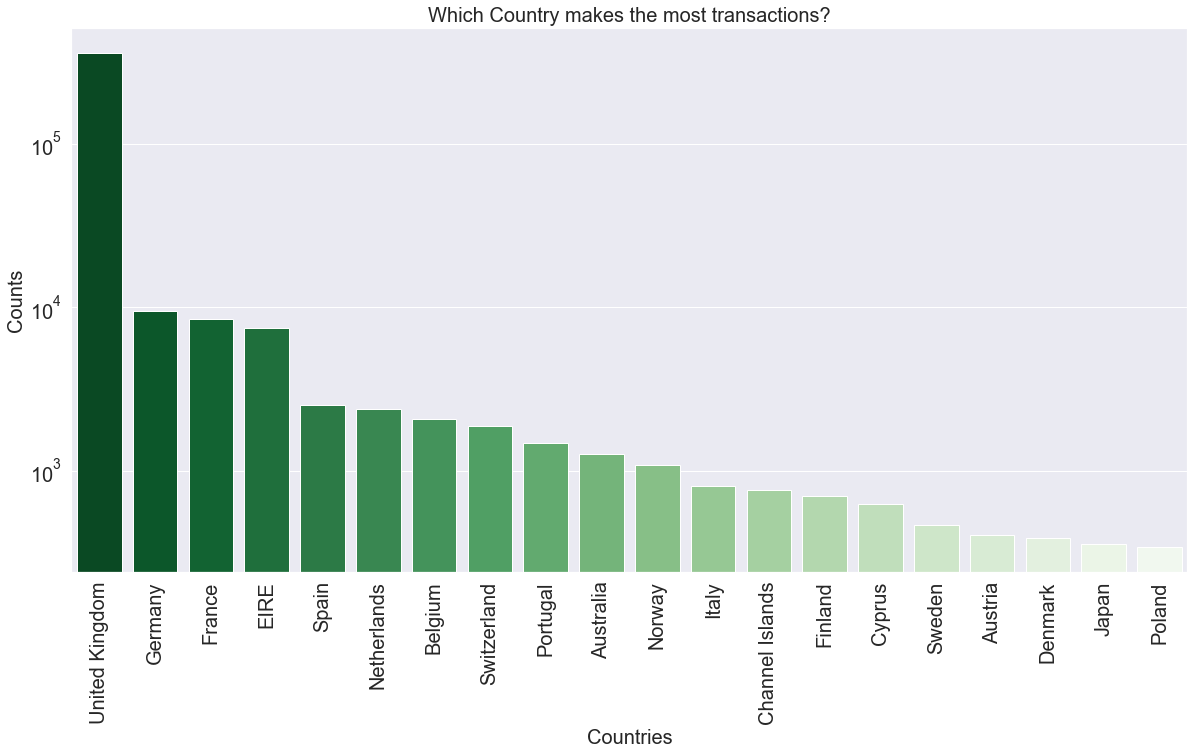

In [7]:
X = df.Country.value_counts()[:20].index
Y= df.Country.value_counts()[:20].values

plt.figure(figsize=(20,10));
sns.barplot(X, Y, palette="Greens_r")

#x axis label
plt.xlabel("Countries",size=20)
plt.xticks(size=20, rotation=90)

#y axis label
plt.ylabel("Counts",size=20)
plt.yticks(size=20)
plt.yscale('log')

#plot label
plt.title("Which Country makes the most transactions?",size = 20)   
sns.set_style("whitegrid")

### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [8]:
df['Revenue'] = df["Quantity"] * df['UnitPrice']

df_top_10 = df_top_10 = {'CustomerID':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].index,
            'Revenue':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].values}
df_top_10 = pd.DataFrame(df_top_10)
df_top_10

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [9]:
df_top_cust = {"CustomerID":df.CustomerID.value_counts()[:5].index,
                  "Frequency":df.CustomerID.value_counts()[:5].values}
df_top_cust = pd.DataFrame(df_top_cust)
df_top_cust

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [10]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


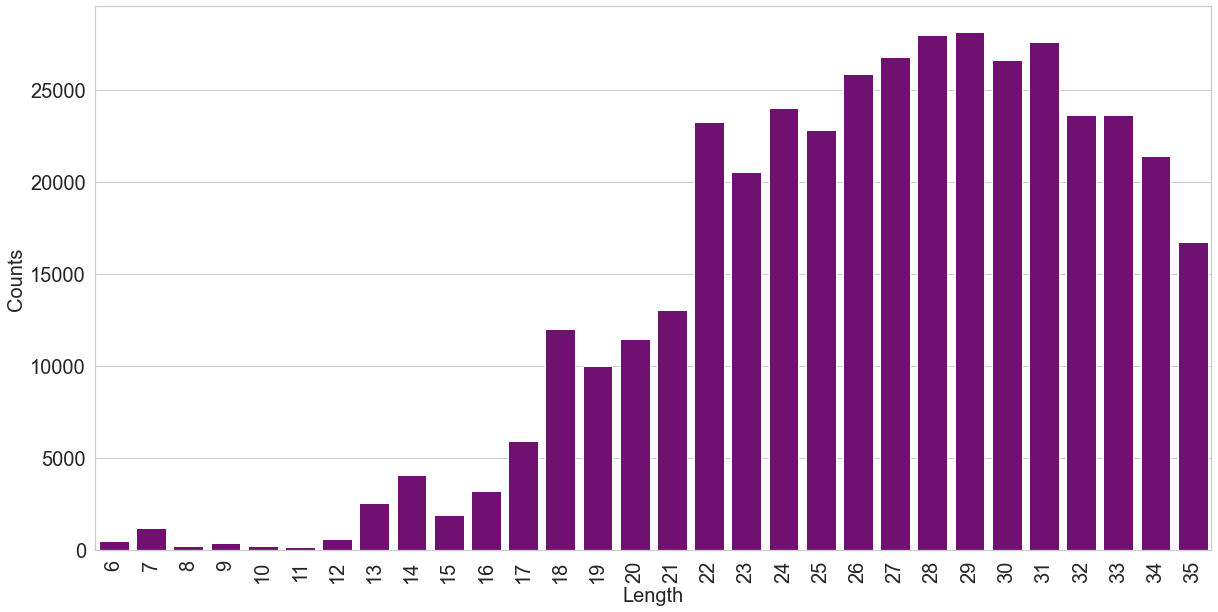

In [11]:
X = df.Description.apply(len).value_counts().index
Y = df.Description.apply(len).value_counts().values

plt.figure(figsize=(20,10));
sns.barplot(X, Y,palette=[ "purple"])

#x axis label
plt.xlabel("Length",size=20)
plt.xticks(size=20, rotation=90)

#y axis label
plt.ylabel("Counts",size=20)
plt.yticks(size=20)

sns.set_style("darkgrid")

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [12]:
import datetime
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.day_name()
df["Date"] = df.InvoiceDate.dt.date

<ipython-input-12-33cd0c067d28>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.InvoiceDate.dt.week


In [13]:
df.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,Wednesday,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,Wednesday,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,Wednesday,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [14]:
grouped_features = ['Date','Year','Quarter','Month','Week','Weekday','Dayofyear','Day','StockCode','Quantity','Revenue']

In [15]:
df.groupby(grouped_features,as_index=False)[['Quantity','Revenue']].sum().head()

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,Wednesday,1,10002,12,10.20
1,2010-12-01,2010,4,12,48,2,Wednesday,1,10002,48,40.80
2,2010-12-01,2010,4,12,48,2,Wednesday,1,10125,2,1.70
3,2010-12-01,2010,4,12,48,2,Wednesday,1,10133,5,4.25
4,2010-12-01,2010,4,12,48,2,Wednesday,1,15044B,1,2.95


## (Optional Part)
#### You Can go on with the Modelling part using any type of 
  - ML model 
  - features pre-processing 
  - Loss function

as mentioned in the Questions

### Modelling

# Great Job
### Now go through the Food Review Notebook